In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv("C:/Users/SAMRAJ/Downloads/retail_sales_dataset.csv")
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [20]:
print(data.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [22]:
print(data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [24]:
print(data.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [26]:
data.select_dtypes(include=['object'])
for col in data.select_dtypes(include=['object']):
    print(data[col].value_counts())

Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
              ..
2023-09-10     1
2023-02-16     1
2023-03-31     1
2023-01-25     1
2023-05-28     1
Name: count, Length: 345, dtype: int64
Customer ID
CUST001     1
CUST672     1
CUST659     1
CUST660     1
CUST661     1
           ..
CUST339     1
CUST340     1
CUST341     1
CUST342     1
CUST1000    1
Name: count, Length: 1000, dtype: int64
Gender
Female    510
Male      490
Name: count, dtype: int64
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [28]:
# cleaning
data['Age'].fillna(data['Age'].mean())


0      34
1      26
2      50
3      37
4      30
       ..
995    62
996    52
997    23
998    36
999    47
Name: Age, Length: 1000, dtype: int64

In [30]:
data['Date'] = pd.to_datetime(data['Date'])

In [32]:
data['Product Category'] = data['Product Category'].str.strip()

In [34]:
data.drop_duplicates(inplace=True)

In [36]:
import pandas as pd
from scipy import stats  # For z-score calculation
def zscore_outliers(data):
    z_scores = stats.zscore(data)  # Calculate z-scores
    threshold = 3  # Common threshold for outliers (can be adjusted)
    outliers = data[np.abs(z_scores) > threshold]
    return outliers
outliers_zscore = zscore_outliers(data['Age'])  
print(outliers_zscore)

Series([], Name: Age, dtype: int64)


In [38]:
for col in data.columns:
  # Check if data type is numeric (for mean, median, and standard deviation)
  if not pd.api.types.is_numeric_dtype(data[col]):
    print(f"Statistics for column '{col}' (non-numeric):")
    print(f"  Mode: {data[col].mode()[0]}")  # Most frequent value (mode)
    continue

  print(f"Statistics for column '{col}':")
  print(f"  Mean: {data[col].mean()}")
  print(f"  Median: {data[col].median()}")
  print(f"  Mode: {data[col].mode()[0]}")  # Most frequent value (mode)
  print(f"  Standard deviation: {data[col].std()}")
  print()

Statistics for column 'Transaction ID':
  Mean: 500.5
  Median: 500.5
  Mode: 1
  Standard deviation: 288.8194360957494

Statistics for column 'Date' (non-numeric):
  Mode: 2023-05-16 00:00:00
Statistics for column 'Customer ID' (non-numeric):
  Mode: CUST001
Statistics for column 'Gender' (non-numeric):
  Mode: Female
Statistics for column 'Age':
  Mean: 41.392
  Median: 42.0
  Mode: 43
  Standard deviation: 13.681429659122532

Statistics for column 'Product Category' (non-numeric):
  Mode: Clothing
Statistics for column 'Quantity':
  Mean: 2.514
  Median: 3.0
  Mode: 4
  Standard deviation: 1.1327343409145405

Statistics for column 'Price per Unit':
  Mean: 179.89
  Median: 50.0
  Mode: 50
  Standard deviation: 189.68135627129138

Statistics for column 'Total Amount':
  Mean: 456.0
  Median: 135.0
  Mode: 50
  Standard deviation: 559.997631555123



In [40]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
data.set_index('Date', inplace=True)

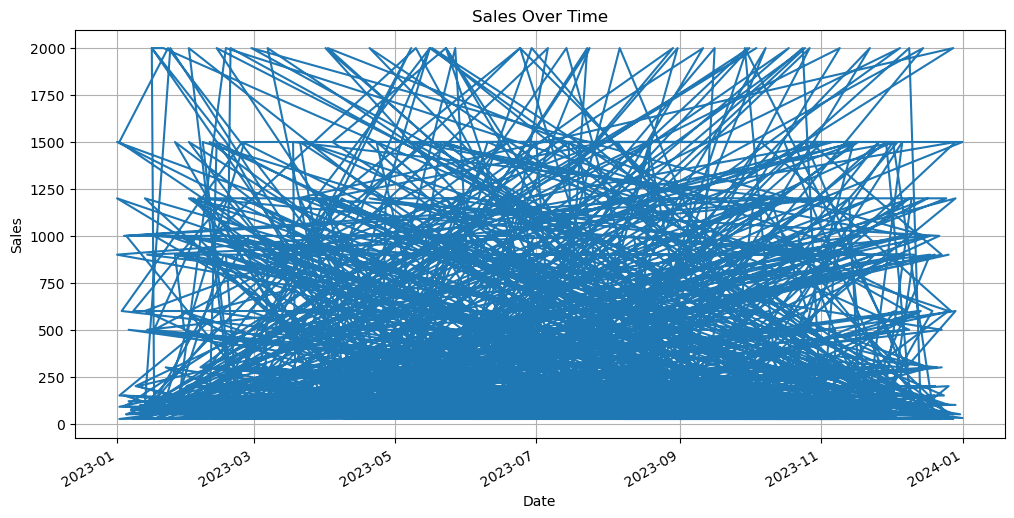

In [44]:
# Plot time series data
data['Total Amount'].plot(figsize=(12, 6))  # Replace 'sales' with your sales column name
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

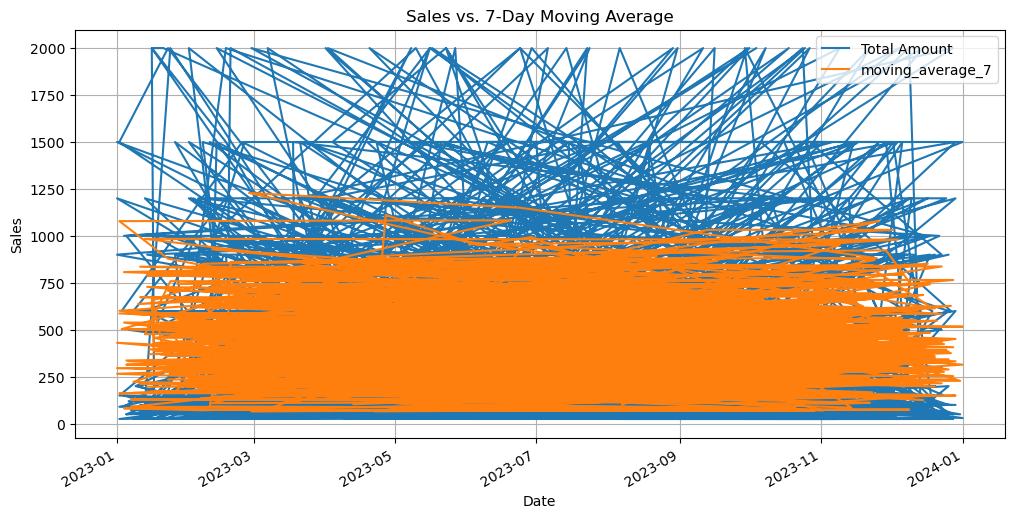

In [46]:
# Calculate 7-day moving average
data['moving_average_7'] = data['Total Amount'].rolling(window=7).mean()

# Plot original sales with moving average
data[['Total Amount', 'moving_average_7']].plot(figsize=(12, 6))
plt.title('Sales vs. 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

       Customer ID         Age  Gender
count         1000  1000.00000    1000
unique        1000         NaN       2
top        CUST001         NaN  Female
freq             1         NaN     510
mean           NaN    41.39200     NaN
std            NaN    13.68143     NaN
min            NaN    18.00000     NaN
25%            NaN    29.00000     NaN
50%            NaN    42.00000     NaN
75%            NaN    53.00000     NaN
max            NaN    64.00000     NaN
     Total Amount  Quantity
Age                        
18     534.047619         4
19     708.095238         4
20     411.666667         4
21     629.250000         4
22     507.407407         4
23     342.500000         4
24     361.000000         4
25     495.000000         4
26     635.454545         4
27     408.043478         4
28     412.857143         4
29     410.625000         4
30     445.000000         4
31     464.545455         3
32     292.105263         4
33     624.000000         4
34     599.464286         4


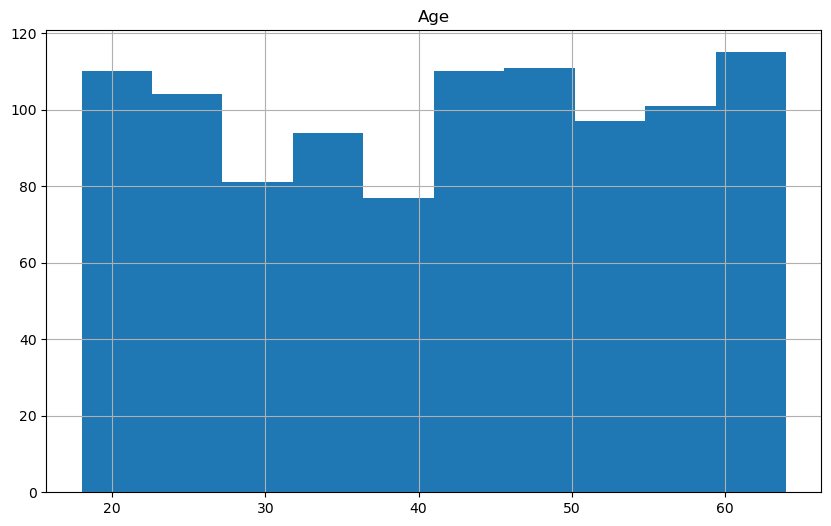

In [48]:
# Describe customer demographics 
customer_demographics = data[['Customer ID', 'Age', 'Gender']]
print(customer_demographics.describe(include='all'))  # Summary statistics

# Group by demographics and analyze purchase behavior (average spend, frequent items)
grouped_by_age = data.groupby('Age').agg({'Total Amount': 'mean', 'Quantity': 'nunique'})  

print(grouped_by_age)

# Visualize demographics (histograms, boxplots)
customer_demographics.hist(figsize=(10, 6))  # Histogram of age
plt.show()

In [50]:
# Total sales
total_sales = data['Total Amount'].sum()
print(f"Total sales: ${total_sales:.2f}")

# Sales by product category
category_sales = data.groupby('Product Category')['Total Amount'].sum()
print(f"\nTop 3 selling categories:")
print(category_sales.sort_values(ascending=False).head(3))

# Customer purchase frequency
customer_frequency = data.groupby('Customer ID')['Transaction ID'].count()
print(f"\nAverage purchase frequency per customer: {customer_frequency.mean():.2f}")

Total sales: $456000.00

Top 3 selling categories:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

Average purchase frequency per customer: 1.00


Total Sales: $456000.00


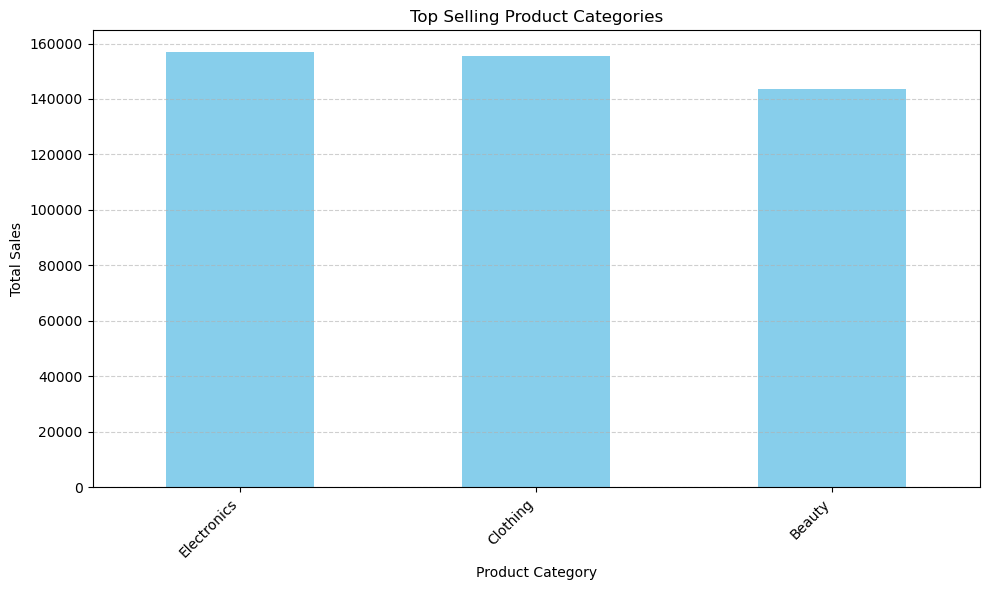

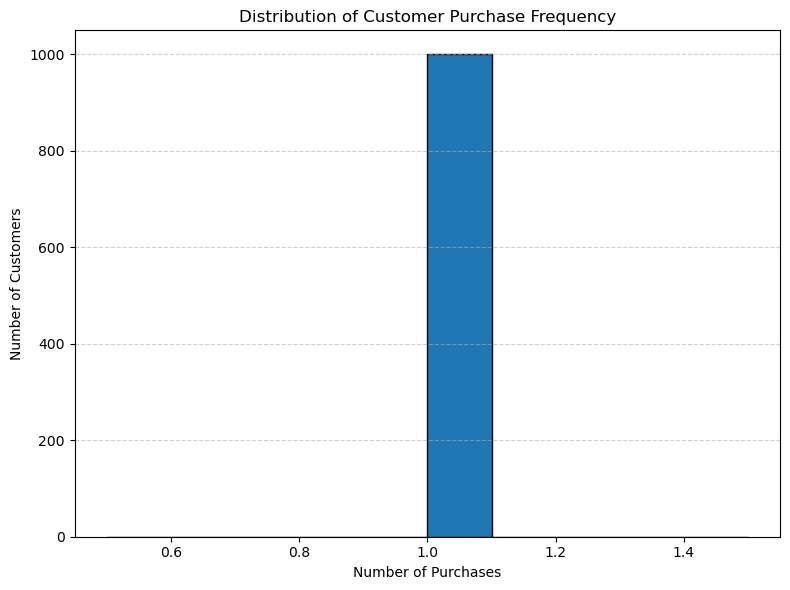

In [52]:
# Total Sales
total_sales = data['Total Amount'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# Sales by Product Category
category_sales = data.groupby('Product Category')['Total Amount'].sum()

# Plot Top 5 Selling Categories (Bar Chart)
top_5_categories = category_sales.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='skyblue')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Customer Purchase Frequency
customer_frequency = data.groupby('Customer ID')['Transaction ID'].count()

# Distribution of Purchase Frequency (Histogram)
plt.figure(figsize=(8, 6))
customer_frequency.plot.hist(bins=10, edgecolor='black')  # Adjust 'bins' for desired granularity
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Average Purchase Value per Customer
avg_purchase_value = data.groupby('Customer ID')['Total Amount'].mean()

In [54]:
# Analyze by Gender:

# Average purchase value by gender
avg_purchase_value_gender = data.groupby('Gender')['Total Amount'].mean()
print(f"\nAverage purchase value by gender:")
print(avg_purchase_value_gender)

# Purchase frequency by gender
purchase_frequency_gender = data.groupby('Gender')['Transaction ID'].count()
print(f"\nPurchase frequency by gender:")
print(purchase_frequency_gender)

# ... (similar analysis for other metrics like total spending per gender)

# Analyze by Age Group:

# Bin age into groups (replace with your desired age ranges)
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 65, 100])

# Average spending per age group
avg_spend_age_group = data.groupby('Age Group')['Total Amount'].mean()
print(f"\nAverage spending per age group:")
print(avg_spend_age_group)


Average purchase value by gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64

Purchase frequency by gender:
Gender
Female    510
Male      490
Name: Transaction ID, dtype: int64

Average spending per age group:
Age Group
(18, 25]     495.506757
(25, 35]     480.390244
(35, 45]     454.801980
(45, 65]     427.122642
(65, 100]           NaN
Name: Total Amount, dtype: float64


C:\Users\SAMRAJ\AppData\Local\Temp\ipykernel_4988\1654591610.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age_group = data.groupby('Age Group')['Total Amount'].mean()


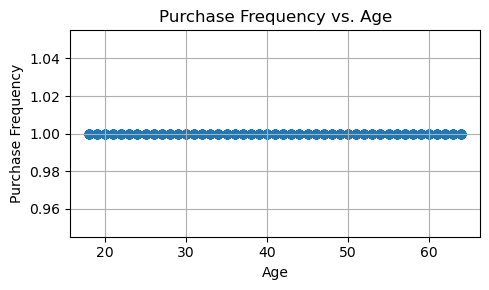

In [56]:
customer_frequency = data.groupby('Customer ID')['Transaction ID'].count()
plt.figure(figsize=(5, 3))
plt.scatter(data['Age'], customer_frequency)
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
#Results
#Data Loading and Cleaning: The result will be a cleaned dataset ready for analysis.
#Descriptive Statistics: You'll obtain basic statistics like mean, median, mode, and standard deviation.
#Time Series Analysis: Trends and seasonal patterns in sales over time will be identified.
#Customer and Product Analysis: Insights into customer demographics and purchasing behavior will be uncovered.
#Visualization: Insights will be effectively communicated through various plots.